# Grafos

Prof. Dr. Henry Cagnini

## Sumário

1. Introdução
   1. Conceitos e definições
2. Aplicações
3. Caminhamento em grafos
4. Caminhos entre vértices
5. Caminho de menor custo
6. Árvore geradora
    1. árvore mínima
7. Análise de grafos
8. Bibliografia

## Introdução

### O que são grafos?

Um grafo é um tipo de estrutura de dados não-tabular, composta por entidades (nós), em que os relacionamentos entre as entidades são demonstrados por arestas.

In [43]:
import networkx as nx
from matplotlib import pyplot as plt

def draw_graph(graph_type, edges, draw_weights=False, node_color='lightblue'):
    G = graph_type()

    for (node_a, node_b, weight) in edges:
        G.add_edge(node_a, node_b, weight=weight)

    pos = nx.spring_layout(G)  
    nx.draw(
        G, pos, 
        with_labels=True, 
        node_color=node_color, 
        edge_color='gray', 
        node_size=2000, 
        font_size=15, 
        font_color='black', 
        arrowstyle='-|>', 
        arrowsize=20
    )

    if draw_weights:
        edges = G.edges(data=True)
        edge_labels = {(u, v): f"{d['weight']}" for u, v, d in edges}
        nx.draw_networkx_edge_labels(
            G, pos, edge_labels=edge_labels, 
            font_color='black'
        )
    
    plt.show()    

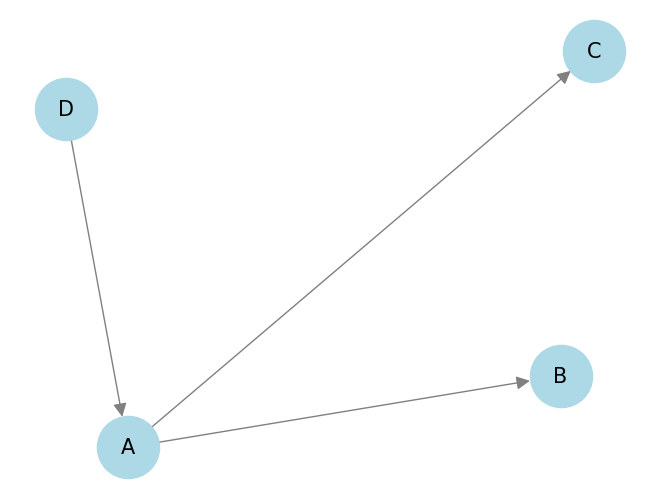

In [45]:
draw_graph(
    graph_type=nx.DiGraph, 
    edges=[('A', 'B', 0),  ('A', 'C', 0),  ('D', 'A', 0)]
)

### Que tipos de grafos existem?

Existem dois tipos de grafos: direcionados e não-direcionados

Em um grafo direcionado, o sentido de movimento pode ser apenas na direção das setas. Esta restrição não existe em um grafo não-direcionado



### Que tipos de arestas existem?

Geralmente, as arestas de um grafo possuem **pesos**. O peso é uma medida que descreve o custo de deslocamento de um nó à outro

Pensando em um exemplo de deslocamento entre cidades, o **peso** de uma aresta entre as cidades **A** e **B** seria a distância em kms destas cidades


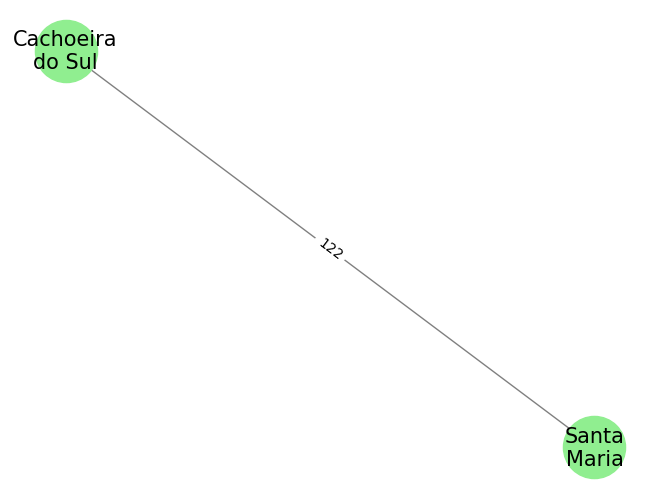

In [44]:
import networkx as nx
from matplotlib import pyplot as plt


draw_graph(
    graph_type=nx.Graph, edges=[('Santa\nMaria', 'Cachoeira\ndo Sul', 122)], 
    draw_weights=True,
    node_color='lightgreen'
)

## Representação em código-fonte

Existem duas maneiras de representar grafos em código-fonte: com **listas encadeadas** e com **matrizes de adjacência**.

Cada implementação possui seus prós e contras:

|          Característica |   Lista encadeada |    Matriz de adjacências |
|:------------------------|:------------------|:-------------------------|
| Complexidade de acesso  |            $O(n)$ |                   $O(1)$ |
| Complexidade de espaço  |            $O(n)$ |                  $O(n^2)$|
|                         |                   |                          |

## Implementação como lista encadeada

Uma implementação em lista em C de grafos é a seguinte:

```C
#include <stdio.h>
#include <stdlib.h>

struct Node {
    char *nome;
    int n_vizinhos;
    int *custos;
    struct Node* vizinhos;
};

struct Graph {
    int n_nos;
    struct Node* nos;
};
```

```C
int main() {
    struct Graph *g = (struct Graph*)malloc(sizeof(struct Graph));
    g->n_nos = 3;

    g->nos = (struct Node*) malloc(sizeof(struct Node) * 3);
    g->nos[0].nome = "Santa Maria";
    g->nos[1].nome = "Cachoeira do Sul";
    g->nos[2].nome = "Frederico Westphalen";
    
    g->nos[0].n_vizinhos = 2;
    g->nos[1].n_vizinhos = 1;
    g->nos[2].n_vizinhos = 1;
```

```C
    g->nos[0].vizinhos = (struct Node*) malloc(sizeof(struct Node) * g->nos[0].n_vizinhos);
    g->nos[1].vizinhos = (struct Node*) malloc(sizeof(struct Node) * g->nos[1].n_vizinhos);
    g->nos[2].vizinhos = (struct Node*) malloc(sizeof(struct Node) * g->nos[2].n_vizinhos);

    g->nos[0].custos = (int*) malloc(sizeof(int) * g->nos[0].n_vizinhos);
    g->nos[1].custos = (int*) malloc(sizeof(int) * g->nos[1].n_vizinhos);
    g->nos[2].custos = (int*) malloc(sizeof(int) * g->nos[2].n_vizinhos);
```

```C
    g->nos[0].vizinhos[0] = g->nos[1];  // cachoeira do sul
    g->nos[0].vizinhos[1] = g->nos[2];  // frederico westphalen
    g->nos[1].vizinhos[0] = g->nos[0];  // santa maria
    g->nos[2].vizinhos[0] = g->nos[0];  // santa maria

    g->nos[0].custos[0] = 122;  // cachoeira do sul
    g->nos[0].custos[1] = 290;  // frederico westphalen
    g->nos[1].custos[0] = g->nos[0].custos[0];  // santa maria
    g->nos[2].custos[0] = g->nos[0].custos[1];  // santa maria
```

```C
    for(int i = 0; i < g->n_nos; i++) {
        printf(
            "O no %d se chama %s e possui %d vizinhos\n", i, 
            g->nos[i].nome, g->nos[i].n_vizinhos
        );
        for(int j = 0; j < g->nos[i].n_vizinhos; j++) {
            printf(
                "\tO vizinho %d do no %s se chama %s e fica a %dkm\n", j, 
                g->nos[i].nome, g->nos[i].vizinhos[j].nome, g->nos[i].custos[j]
            );
        }
    }
    
    return 0;
}
```

**Saída:**

```
O no 0 se chama Santa Maria e possui 2 vizinhos
	O vizinho 0 do no Santa Maria se chama Cachoeira do Sul e fica a 122km
	O vizinho 1 do no Santa Maria se chama Frederico Westphalen e fica a 290km
O no 1 se chama Cachoeira do Sul e possui 1 vizinhos
	O vizinho 0 do no Cachoeira do Sul se chama Santa Maria e fica a 122km
O no 2 se chama Frederico Westphalen e possui 1 vizinhos
	O vizinho 0 do no Frederico Westphalen se chama Santa Maria e fica a 290km
```

## Implementação como matriz de adjacências

A implementação em C como lista de adjacências é relativamente mais simples:

```C
#include <stdio.h>
#include <stdlib.h>

int main() {
    char **nomes = (char**)malloc(sizeof(char*) * 3);
    nomes[0] = "Santa Maria";
    nomes[1] = "Cachoeira do Sul";
    nomes[2] = "Frederico Westphalen";

    int n_nos = 3;

    int matrix[3][3];
```

```C
    matrix[0][0] = 0;
    matrix[0][1] = 122;
    matrix[0][2] = 290;
    matrix[1][0] = 122;
    matrix[1][1] = 0;
    matrix[1][2] = -1;  // sem conexão
    matrix[2][0] = 290;
    matrix[2][1] = -1;  // sem conexão
    matrix[2][2] = 0;
```

```C
    for(int i = 0; i < n_nos; i++) {
        printf("O no %d se chama %s\n", i, nomes[i]);
        int n_vizinhos = 0;
        for(int j = 0; j < n_nos; j++) {
            if(matrix[i][j] > 0) {
                printf(
                    "\tO vizinho %d do no %s se chama %s e fica a %dkm\n",
                    n_vizinhos, nomes[i], nomes[j], matrix[i][j]
                );
                n_vizinhos += 1;
            }
        }
    }
    return 0;
}
```

**Saída:**

```
O no 0 se chama Santa Maria
	O vizinho 0 do no Santa Maria se chama Cachoeira do Sul e fica a 122km
	O vizinho 1 do no Santa Maria se chama Frederico Westphalen e fica a 290km
O no 1 se chama Cachoeira do Sul
	O vizinho 0 do no Cachoeira do Sul se chama Santa Maria e fica a 122km
O no 2 se chama Frederico Westphalen
	O vizinho 0 do no Frederico Westphalen se chama Santa Maria e fica a 290km
```

## Bibliografia

Cormen, Thomas H., et al. "Algoritmos: teoria e prática." Editora Campus 2 (2002): 296.

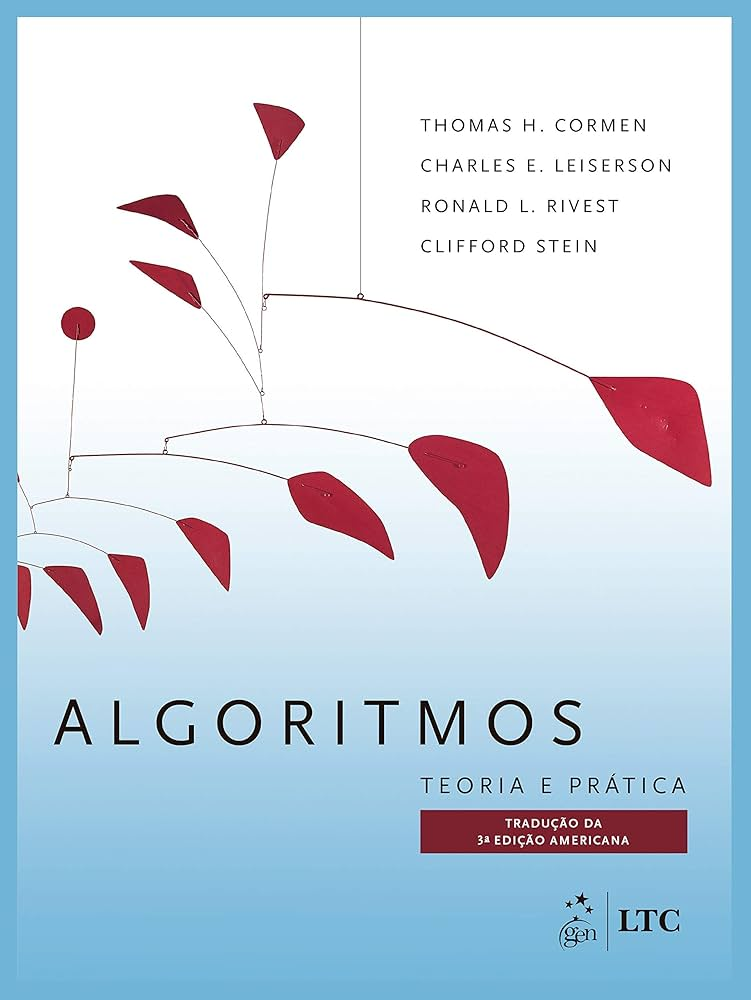